Mounting the Google Drive for fetching the train/test data.

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading data from Drive.

In [30]:
df = pd.read_csv("/content/drive/MyDrive/twitter/Tweets.csv")

In [31]:
# Importing required libraries
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.callbacks import EarlyStopping
!pip install tensorflow-addons==0.8.3
!pip install tensorflow==2.2.0-rc3
import tensorflow_addons as tfa
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.0-rc3 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.0+zzzcolab20220506153740, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.4+zzzcolab20220516125453, 2.6.5, 2.6.5+zzzcolab20220523104206, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.0+zzzcolab20220506150900, 2.7.1, 2.7.2, 2.7.2+zzzcolab20220516114640, 2.7.3, 2.7.3+zzzcolab20220523111007, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.0+zzzcolab20220506162203, 2.8.1, 2.8.1+zzzcolab20220516111314, 2.8.1+zzzcolab20220518083849, 2.8.2, 2.8

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [52]:
Data = df[['non_punctuated_tweets','sentiment']]

In [53]:
Data

,non_punctuated_tweets,sentiment
0,put hours game last year still holds well blas...,positive
1,story great terrible,positive
2,jaedo event bought tickets nd quarter finally ...,negative
3,year going super dynamic bc im graduating uni ...,positive
4,literally tough year none plan going right pre...,positive
...,...,...
17769,really rough one mental health truly feel many...,positive
17770,happy new year everyone except boy dated coupl...,positive
17771,crazy bought car moved shot porn butt plug bum...,negative
17772,think descent art year despite able use tablet...,neutral


Tokenization

In [34]:

Data['tokenized_tweets'] = Data.apply(lambda row : nltk.word_tokenize(str(row['non_punctuated_tweets'])),axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
Data

,non_punctuated_tweets,sentiment,tokenized_tweets
0,put hours game last year still holds well blas...,positive,"[put, hours, game, last, year, still, holds, w..."
1,story great terrible,positive,"[story, great, terrible]"
2,jaedo event bought tickets nd quarter finally ...,negative,"[jaedo, event, bought, tickets, nd, quarter, f..."
3,year going super dynamic bc im graduating uni ...,positive,"[year, going, super, dynamic, bc, im, graduati..."
4,literally tough year none plan going right pre...,positive,"[literally, tough, year, none, plan, going, ri..."
...,...,...,...
17769,really rough one mental health truly feel many...,positive,"[really, rough, one, mental, health, truly, fe..."
17770,happy new year everyone except boy dated coupl...,positive,"[happy, new, year, everyone, except, boy, date..."
17771,crazy bought car moved shot porn butt plug bum...,negative,"[crazy, bought, car, moved, shot, porn, butt, ..."
17772,think descent art year despite able use tablet...,neutral,"[think, descent, art, year, despite, able, use..."


Lemmatization

In [36]:
def lemma(data):
    return " ".join([Word(word).lemmatize() for word in data])
Data['lemmatized_tweets']= Data['tokenized_tweets'].apply(lambda x: lemma(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
Data

,non_punctuated_tweets,sentiment,tokenized_tweets,lemmatized_tweets
0,put hours game last year still holds well blas...,positive,"[put, hours, game, last, year, still, holds, w...",put hour game last year still hold well blast ...
1,story great terrible,positive,"[story, great, terrible]",story great terrible
2,jaedo event bought tickets nd quarter finally ...,negative,"[jaedo, event, bought, tickets, nd, quarter, f...",jaedo event bought ticket nd quarter finally p...
3,year going super dynamic bc im graduating uni ...,positive,"[year, going, super, dynamic, bc, im, graduati...",year going super dynamic bc im graduating uni ...
4,literally tough year none plan going right pre...,positive,"[literally, tough, year, none, plan, going, ri...",literally tough year none plan going right pre...
...,...,...,...,...
17769,really rough one mental health truly feel many...,positive,"[really, rough, one, mental, health, truly, fe...",really rough one mental health truly feel many...
17770,happy new year everyone except boy dated coupl...,positive,"[happy, new, year, everyone, except, boy, date...",happy new year everyone except boy dated coupl...
17771,crazy bought car moved shot porn butt plug bum...,negative,"[crazy, bought, car, moved, shot, porn, butt, ...",crazy bought car moved shot porn butt plug bum...
17772,think descent art year despite able use tablet...,neutral,"[think, descent, art, year, despite, able, use...",think descent art year despite able use tablet...


Converting Lemmatized Tweets to Vectors.


In [38]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 500
# Max number of words in each tweets.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 100

In [39]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, split=' ') 
tokenizer.fit_on_texts(Data.lemmatized_tweets.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 22546 unique tokens.


In [40]:
X = tokenizer.texts_to_sequences(Data.lemmatized_tweets.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (17774, 50)


One Hot Encoding of the Sentiment Column.


In [41]:
Y = pd.get_dummies(Data.sentiment).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (17774, 3)


In [42]:
Y

array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

Train Test Split.

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(14219, 50) (14219, 3)
(3555, 50) (3555, 3)


Modelling.

In [44]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)
f1 = tfa.metrics.F1Score(36,'micro' or 'macro')
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1])

epochs = 7
batch_size = 64

In [45]:
history_1 = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/7
200/200 [==============================] - ETA: 0s - loss: 0.7620 - accuracy: 0.7092 - f1_score: 0.7092

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2086: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


200/200 [==============================] - 41s 191ms/step - loss: 0.7620 - accuracy: 0.7092 - f1_score: 0.7092 - val_loss: 0.7295 - val_accuracy: 0.7082 - val_f1_score: 0.7082
Epoch 2/7
200/200 [==============================] - 26s 132ms/step - loss: 0.6974 - accuracy: 0.7198 - f1_score: 0.7198 - val_loss: 0.7283 - val_accuracy: 0.7053 - val_f1_score: 0.7053
Epoch 3/7
200/200 [==============================] - 26s 130ms/step - loss: 0.6641 - accuracy: 0.7338 - f1_score: 0.7338 - val_loss: 0.7091 - val_accuracy: 0.7201 - val_f1_score: 0.7201
Epoch 4/7
200/200 [==============================] - 28s 139ms/step - loss: 0.6422 - accuracy: 0.7406 - f1_score: 0.7406 - val_loss: 0.6893 - val_accuracy: 0.7215 - val_f1_score: 0.7215
Epoch 5/7
200/200 [==============================] - 26s 130ms/step - loss: 0.6152 - accuracy: 0.7540 - f1_score: 0.7540 - val_loss: 0.6628 - val_accuracy: 0.7384 - val_f1_score: 0.7384
Epoch 6/7
200/200 [==============================] - 26s 130ms/step - loss: 0.59

In [46]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

112/112 [==============================] - 2s 15ms/step - loss: 0.6606 - accuracy: 0.7463 - f1_score: 0.7463
Test set
  Loss: 0.661
  Accuracy: 0.746


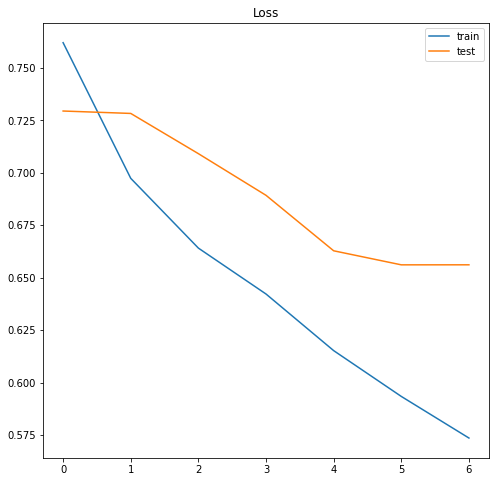

In [47]:
plt.figure(figsize=(8, 8))
plt.title('Loss')
plt.plot(history_1.history['loss'], label='train')
plt.plot(history_1.history['val_loss'], label='test')
plt.legend()
plt.show()


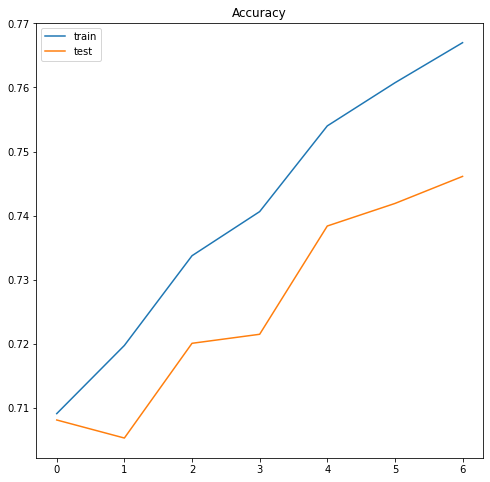

In [48]:
plt.figure(figsize=(8, 8))
plt.title('Accuracy')
plt.plot(history_1.history['accuracy'], label='train')
plt.plot(history_1.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [51]:
tweet = [""]
seq = tokenizer.texts_to_sequences(tweet)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['negative','neutral','positive']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 22ms/step
[[0.06082759 0.03203068 0.90714175]] positive


In [49]:
##Today was the worst day of my life as i got dreched while going for my interview. -ve
##Hello, how you doinnn?? =
##Wow what a lovely day it is +ve
